In [5]:
pwd

'/fs/ddn/sdf/home/c/carsmith/notebooks'

## Visualizing Photon Library & Siren

In [1]:
# README FIRST
# checkout `photonlib` code under your notebook directory

# ==================
# cd <my_notebooks>
# git clone https://github.com/kvtsang/photonlib.git
# ==================

In [2]:
#LUT only includes up to 219th epoch

In [1]:
from photonlib import PhotonLib

import math
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
import pandas as pd
import seaborn as sns

In [2]:
# load file
plib_lut = PhotonLib.load('/sdf/group/neutrino/kvtsang/icarus/opt-siren/plib_data/plib.h5')
plib_model = PhotonLib.load('/scratch/c/carsmith/siren_full_out.h5')

[PhotonLib] loading /sdf/group/neutrino/kvtsang/icarus/opt-siren/plib_data/plib.h5
[PhotonLib] file loaded
[PhotonLib] loading /scratch/c/carsmith/siren_full_out.h5
[PhotonLib] file loaded


In [3]:
# size of the LUT
# (nx, ny, nz, n_pmts)
print('shape (lut):', plib_lut.vis_view.shape)
print('shape (siren):', plib_model.vis_view.shape)

# physical dim. of the LUT (in cm)
print('ranges (lut):\n', plib_lut.meta.ranges)
print('ranges (siren) :\n', plib_model.meta.ranges)

shape (lut): (74, 77, 394, 180)
shape (siren): (74, 77, 394, 180)
ranges (lut):
 [[-405.  -35.]
 [-215.  170.]
 [-985.  985.]]
ranges (siren) :
 [[-405.  -35.]
 [-215.  170.]
 [-985.  985.]]


## Plot the visibility of (y,z)-slice for a given PMT

Text(0, 0.5, 'iy')

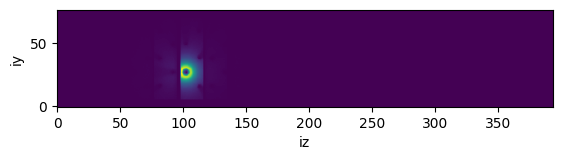

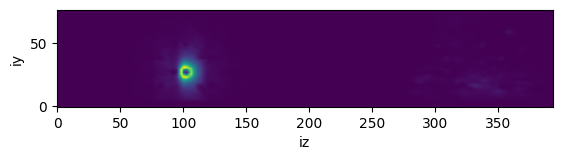

In [4]:
# plot the visibility of (y,z)-slice for a given PMT
pmt = 20
ix = 3

plt.figure(0)
plt.imshow(
    plib_lut.vis_view[ix,:,:,pmt],
    origin='lower',
)
plt.xlabel('iz')
plt.ylabel('iy')

plt.figure(1)
plt.imshow(
    plib_model.vis_view[ix,:,:,pmt],
    origin='lower',
)
plt.xlabel('iz')
plt.ylabel('iy')

## Plotting y-z cross section of detector

Text(0, 0.5, 'iy')

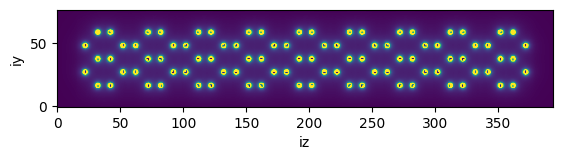

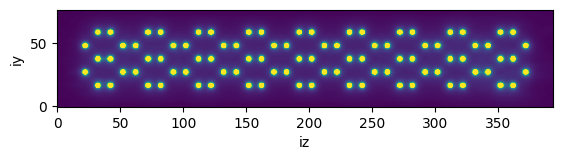

In [5]:
ix = 5

plt.figure(2)
plt.imshow(
    plib_lut.vis_view[ix].sum(axis=-1),
    origin='lower',
    vmin=0, vmax=0.4,
    
    
)
plt.xlabel('iz')
plt.ylabel('iy')

plt.figure(3)
plt.imshow(
    plib_model.vis_view[ix].sum(axis=-1),
    origin='lower',
    vmin=0, vmax=0.4,
)
plt.xlabel('iz')
plt.ylabel('iy')

In [8]:
plib_lut.vis_view[ix].sum(axis=-1).max()

0.580901

## Reproducing loss and bias plots

In [6]:
model_metrics_1 = pd.read_csv('/scratch/c/carsmith/logs/icarus_5_512/version_1/metrics.csv')
model_metrics_2 = pd.read_csv('/scratch/c/carsmith/logs/icarus_5_512/version_2/metrics.csv')
model_metrics_3 = pd.read_csv('/scratch/c/carsmith/logs/icarus_5_512/version_3/metrics.csv')
model_metrics_2['epoch'] += 100
model_metrics_3['epoch'] += 1100

model_metrics = pd.concat([model_metrics_1, model_metrics_2, model_metrics_3], axis=0)
model_metrics['epoch'] += 1

#TESTING FIRST 100 EPOCHS AGAIN
model_metrics_4 = pd.read_csv('/scratch/c/carsmith/logs/icarus_5_512/version_4/metrics.csv')

model_metrics

,loss,bias,epoch,step
0,10.935132,145.898209,1,36
1,1.065781,92.998604,2,73
2,0.655430,77.671501,3,110
3,0.521259,70.127480,4,147
4,0.466325,65.974594,5,184
...,...,...,...,...
495,0.007123,9.325181,1596,18351
496,0.007122,9.323685,1597,18388
497,0.007118,9.322164,1598,18425
498,0.007119,9.323298,1599,18462


Text(0, 0.5, 'Loss')

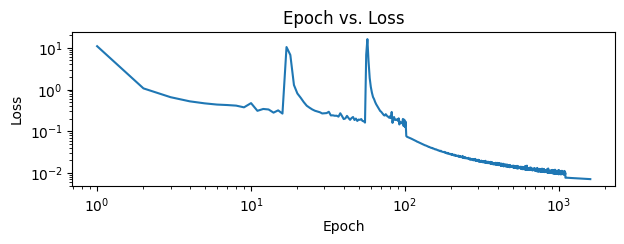

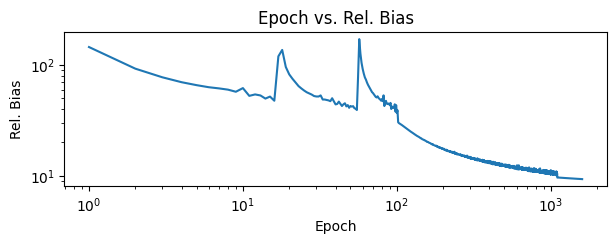

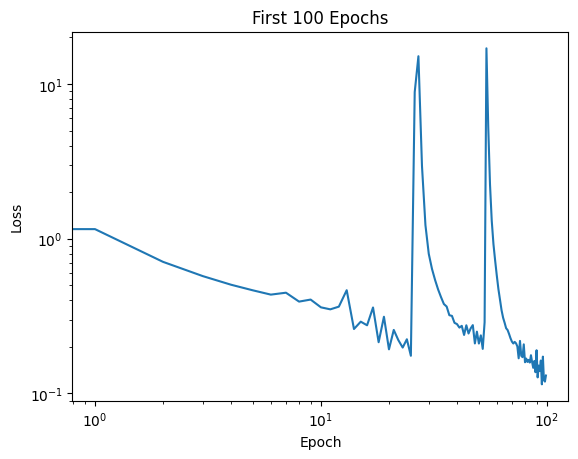

In [7]:
fig = plt.figure(4)
fig.set_figwidth(7)
fig.set_figheight(2)
plt.title('Epoch vs. Loss')
plt.plot(model_metrics.epoch, model_metrics.loss)
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.xlabel("Epoch")
plt.ylabel("Loss")

fig = plt.figure(5)
fig.set_figwidth(7)
fig.set_figheight(2)
plt.title('Epoch vs. Rel. Bias')
plt.plot(model_metrics.epoch, model_metrics.bias)
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.xlabel("Epoch")
plt.ylabel("Rel. Bias")

plt.figure(6)
plt.title('First 100 Epochs')
plt.plot(model_metrics_4.epoch, model_metrics_4.loss)
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.xlabel("Epoch")
plt.ylabel("Loss")

## Visibility heatmap - 2 dimensional histogram

### starting with 1D histograms

/tmp/ipykernel_28518/2764062512.py:7: RuntimeWarning: divide by zero encountered in log10
  log_plib_lut_1d = np.log10(plib_lut_1d)
/tmp/ipykernel_28518/2764062512.py:20: RuntimeWarning: invalid value encountered in log10
  log_plib_model_1d = np.log10(plib_model_1d)


Text(0, 0.5, 'log10_plib_siren')

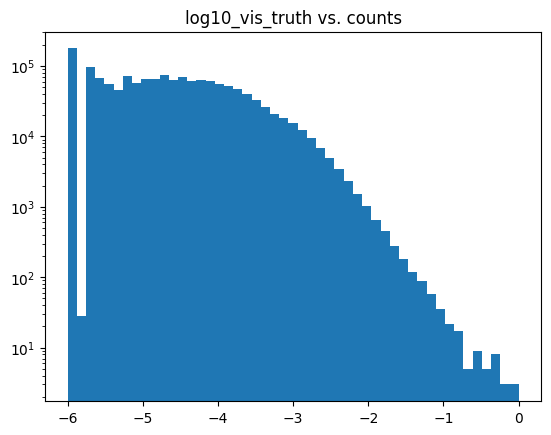

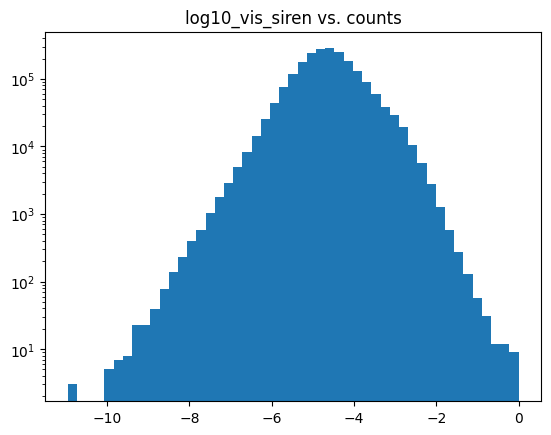

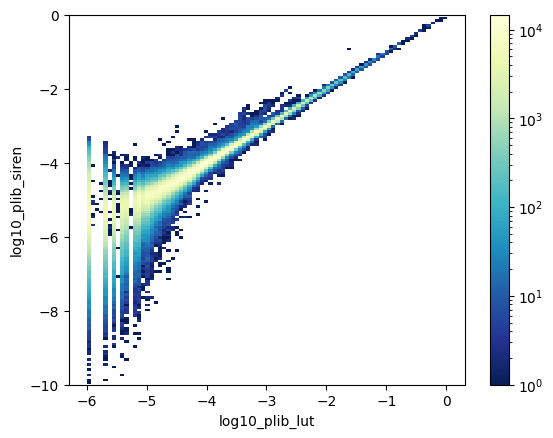

In [8]:
#starting with 1D histograms
#truth
PMT = 150
plib_lut_1d = plib_lut.vis_view[:, :, :, PMT].reshape(2245012, 1) #2245012 for 1 PMT
plib_lut_1d = np.ma.masked_less(plib_lut_1d, 5e-12)
#plib_lut_1d += 10e-7 #addresses divide by 0
log_plib_lut_1d = np.log10(plib_lut_1d)

bins = np.linspace(log_plib_lut_1d.min(), log_plib_lut_1d.max(), 50)
hist, bins, _ = plt.hist(log_plib_lut_1d, bins=bins)
plt.yscale("log")
plt.title("log10_vis_truth vs. counts")

#siren
plt.figure()
plib_model_1d = plib_model.vis_view[:, :, :, PMT].reshape(2245012, 1) #2245012 for 1 PMT
plib_model_1d = np.ma.masked_less(plib_model_1d, 5e-12)

#plib_model_1d += 10e-5 #addresses divide by 0
log_plib_model_1d = np.log10(plib_model_1d)

bins = np.linspace(log_plib_model_1d.min(), log_plib_model_1d.max(), 50)
hist, bins, _ = plt.hist(log_plib_model_1d, bins=bins)

plt.yscale("log")
plt.title("log10_vis_siren vs. counts")

##making a 2d histogram
plib_lut_model = pd.DataFrame(log_plib_lut_1d)
plib_lut_model[1] = log_plib_model_1d


plt.figure()
sns.histplot(plib_lut_model, x = plib_lut_model.loc[:, 0], y = plib_lut_model.loc[:, 1], cmap="YlGnBu_r", cbar = True, binwidth = (0.07,0.07), norm=LogNorm(), vmin=None, vmax=None)
plt.xlabel("log10_plib_lut")
plt.ylim(-10, 0)
plt.ylabel("log10_plib_siren")

## Iterating over detector volume, finding voxel for each pmt with largest difference in visibility between lookup table and model

In [15]:
#maximum difference per PMT
##for each PMT, iterate over all voxels and compute difference btwn visibility value from ICARUS lut and siren
pmts = pd.DataFrame(np.zeros((180, 1)), columns =['max_vis_diff'])
xs = pd.DataFrame(np.zeros((180, 1)), columns = ['x'])
ys = pd.DataFrame(np.zeros((180, 1)), columns = ['y'])
zs = pd.DataFrame(np.zeros((180, 1)), columns = ['z'])
max_diff_vis_data = pd.concat([pmts, xs, ys, zs], axis=1)

In [30]:
#CAREFUL - long run time
for PMT in range (172, 180):
    max_vis_diff = 0
    
    for x in range (0, 74): #74
        for y in range (0, 77): #77
            for z in range (0, 394): #394
                max_vis_value = max_diff_vis_data.iloc[PMT, 0]
                diff = plib_lut.vis_view[x, y, z, PMT] - plib_model.vis_view[x, y, z, PMT] 
                if diff > max_vis_value:
                    max_diff_vis_data.iloc[PMT, 0] = diff
                    max_diff_vis_data.iloc[PMT, 1] = [x]
                    max_diff_vis_data.iloc[PMT, 2] = [y]
                    max_diff_vis_data.iloc[PMT, 3] = [z]

In [32]:
max_vis_diff = 0
for x in range (0, 74): #74
        for y in range (0, 77): #77
            for z in range (0, 394): #394
                max_vis_value = max_diff_vis_data.iloc[111, 0]
                diff = plib_lut.vis_view[x, y, z, 111] - plib_model.vis_view[x, y, z, 111] 
                if diff > max_vis_value:
                    max_diff_vis_data.iloc[111, 0] = diff
                    max_diff_vis_data.iloc[111, 1] = [x]
                    max_diff_vis_data.iloc[111, 2] = [y]
                    max_diff_vis_data.iloc[111, 3] = [z]

In [34]:
print(max_diff_vis_data.iloc[111:180, :])
max_diff_vis_data.to_csv('max_diff_vis_data_2.csv')

     max_vis_diff     x     y      z
111      0.091296  68.0  49.0  101.0
112      0.096159  68.0  16.0  111.0
113      0.094364  68.0  37.0  111.0
114      0.068528  68.0  60.0  112.0
115      0.085884  68.0  16.0  121.0
..            ...   ...   ...    ...
175      0.059045  68.0  17.0  362.0
176      0.092667  68.0  39.0  361.0
177      0.061716  68.0  59.0  360.0
178      0.078367  68.0  27.0  370.0
179      0.048073  68.0  48.0  372.0

[69 rows x 4 columns]


## Plotting max visibility difference voxels in detector volume

,Unnamed: 0,max_vis_diff,x,y,z
0,0,0.064529,5.0,27.0,23.0
1,1,0.082641,5.0,48.0,21.0
2,2,0.083602,5.0,17.0,31.0
3,3,0.071953,5.0,38.0,31.0
4,4,0.092139,5.0,60.0,32.0
...,...,...,...,...,...
175,175,0.059045,68.0,17.0,362.0
176,176,0.092667,68.0,39.0,361.0
177,177,0.061716,68.0,59.0,360.0
178,178,0.078367,68.0,27.0,370.0


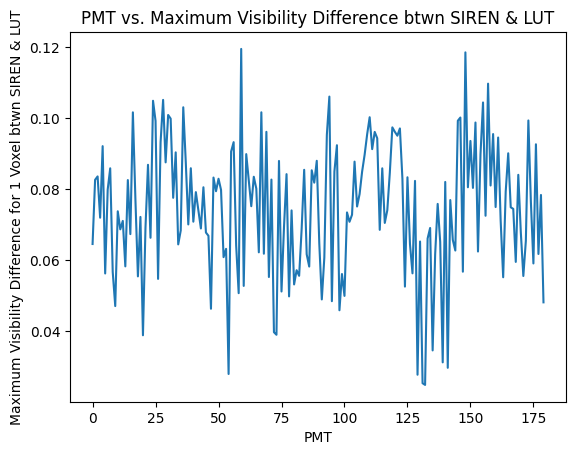

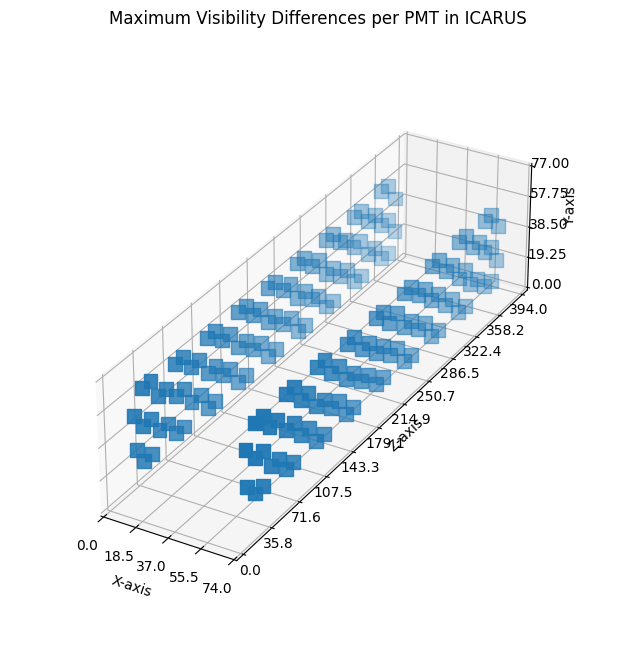

In [29]:
max_diff_1 = pd.read_csv('/sdf/home/c/carsmith/notebooks/max_diff_vis_data_1.csv')
max_diff_2 = pd.read_csv('/sdf/home/c/carsmith/notebooks/max_diff_vis_data_2.csv')

max_diff_1.drop(max_diff_1.index[range(111, 180)], axis = 0, inplace = True)
max_diff_2.drop(max_diff_2.index[range(0, 111)], axis = 0, inplace = True)

max_diff_data = pd.concat([max_diff_1, max_diff_2], axis = 0)
display(max_diff_data)

data = max_diff_data['max_vis_diff']


plt.figure()
plt.plot(max_diff_data.iloc[:, 0], max_diff_data.loc[:,'max_vis_diff'])
plt.title('PMT vs. Maximum Visibility Difference btwn SIREN & LUT')
plt.xlabel('PMT')
plt.ylabel('Maximum Visibility Difference for 1 Voxel btwn SIREN & LUT')

fig = plt.figure(figsize = (17, 8))
ax = plt.subplot(111, projection='3d')
ax.set_xticks(np.linspace(0, 74, 5))
ax.set_yticks(np.linspace(0, 394, 12))
ax.set_zticks(np.linspace(0, 77, 5))
ax.set_xlim(0, 74)
ax.set_ylim(0, 394)
ax.set_zlim(0, 77)
xs, ys, zs = [0, 100], [0, 394], [0, 100]
ax.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs)))

color_map = cm.ScalarMappable(cmap=cm.gray)

color_map.set_array(data)
plt.set_cmap('viridis')
ax.scatter(max_diff_data['x'], max_diff_data['z'], max_diff_data['y'], marker='s',
                 s=100)

ax.set_title("Maximum Visibility Differences per PMT in ICARUS")
ax.set_xlabel('X-axis')
ax.set_ylabel('Z-axis')
ax.set_zlabel('Y-axis')
plt.show()
plt.show(ax)